# ESTUDOS DE PREÇOS DO SETOR DE AGRICULTURA. DATASET DISPONÍVEL NO KAGGLE

Vamos verificar quais produtos mais se correlacionam em relação aos preços.
Vamos verificar quais produtos possuem menor variação de preços e entre eles qual teve a menor variação
Vamos verificar qual dos produtos teve a maior variação de preço (que se destaca de todo o resto)
E por fim, vamos analisar os outliers de cara produto, quais foram os preços que fogem de uma distribuição e dispersão normal

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('agricultural_raw_material.csv')

In [7]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

In [9]:
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)

df = df.dropna()



In [10]:
df.isnull().sum()

Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64

In [11]:
df.columns

Index(['Month', 'Coarse wool Price', 'Coarse wool price % Change',
       'Copra Price', 'Copra price % Change', 'Cotton Price',
       'Cotton price % Change', 'Fine wool Price', 'Fine wool price % Change',
       'Hard log Price', 'Hard log price % Change', 'Hard sawnwood Price',
       'Hard sawnwood price % Change', 'Hide Price', 'Hide price % change',
       'Plywood Price', 'Plywood price % Change', 'Rubber Price',
       'Rubber price % Change', 'Softlog Price', 'Softlog price % Change',
       'Soft sawnwood Price', 'Soft sawnwood price % Change',
       'Wood pulp Price', 'Wood pulp price % Change'],
      dtype='object')

In [12]:
lst = [ 'Coarse wool Price', 'Coarse wool price % Change',
       'Copra Price', 'Copra price % Change', 'Cotton Price',
       'Cotton price % Change', 'Fine wool Price', 'Fine wool price % Change',
       'Hard log Price', 'Hard log price % Change', 'Hard sawnwood Price',
       'Hard sawnwood price % Change', 'Hide Price', 'Hide price % change',
       'Plywood Price', 'Plywood price % Change', 'Rubber Price',
       'Rubber price % Change', 'Softlog Price', 'Softlog price % Change',
       'Soft sawnwood Price', 'Soft sawnwood price % Change',
       'Wood pulp Price', 'Wood pulp price % Change']
df[lst] = df[lst].astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 1 to 326
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         326 non-null    object 
 1   Coarse wool Price             326 non-null    float64
 2   Coarse wool price % Change    326 non-null    float64
 3   Copra Price                   326 non-null    float64
 4   Copra price % Change          326 non-null    float64
 5   Cotton Price                  326 non-null    float64
 6   Cotton price % Change         326 non-null    float64
 7   Fine wool Price               326 non-null    float64
 8   Fine wool price % Change      326 non-null    float64
 9   Hard log Price                326 non-null    float64
 10  Hard log price % Change       326 non-null    float64
 11  Hard sawnwood Price           326 non-null    float64
 12  Hard sawnwood price % Change  326 non-null    float64
 13  Hide Price

In [14]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


In [15]:
df['Month'] = pd.to_datetime(df['Month'], format = '%b%y', yearfirst = False)
df = df.set_index('Month')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 326 entries, 1990-05-01 to 2017-06-01
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coarse wool Price             326 non-null    float64
 1   Coarse wool price % Change    326 non-null    float64
 2   Copra Price                   326 non-null    float64
 3   Copra price % Change          326 non-null    float64
 4   Cotton Price                  326 non-null    float64
 5   Cotton price % Change         326 non-null    float64
 6   Fine wool Price               326 non-null    float64
 7   Fine wool price % Change      326 non-null    float64
 8   Hard log Price                326 non-null    float64
 9   Hard log price % Change       326 non-null    float64
 10  Hard sawnwood Price           326 non-null    float64
 11  Hard sawnwood price % Change  326 non-null    float64
 12  Hide Price                    326 non-null   

In [17]:
class filtronotin:
  def __init__ (self, data_base, caractere):
    self.data_base = data_base
    self.caractere = caractere

  def filtro_tipo_coluna(self):
    carac = self.caractere
    lista_colunas = self.data_base.columns
    colunas_change = [lista_change.append(x) for x in lista_colunas if carac not in x]

class filtroin:
  def __init__ (self, data_base, caractere):
    self.data_base = data_base
    self.caractere = caractere

  def filtro_tipo_coluna(self):
    carac = self.caractere
    lista_colunas = self.data_base.columns
    colunas_change = [lista_change.append(x) for x in lista_colunas if carac in x]

In [18]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9,5)

In [19]:
caractere = '%'
lista_colunas = df.columns
colunas_preco = [print(x) for x in lista_colunas if caractere not in x]

Coarse wool Price
Copra Price
Cotton Price
Fine wool Price
Hard log Price
Hard sawnwood Price
Hide Price
Plywood Price
Rubber Price
Softlog Price
Soft sawnwood Price
Wood pulp Price


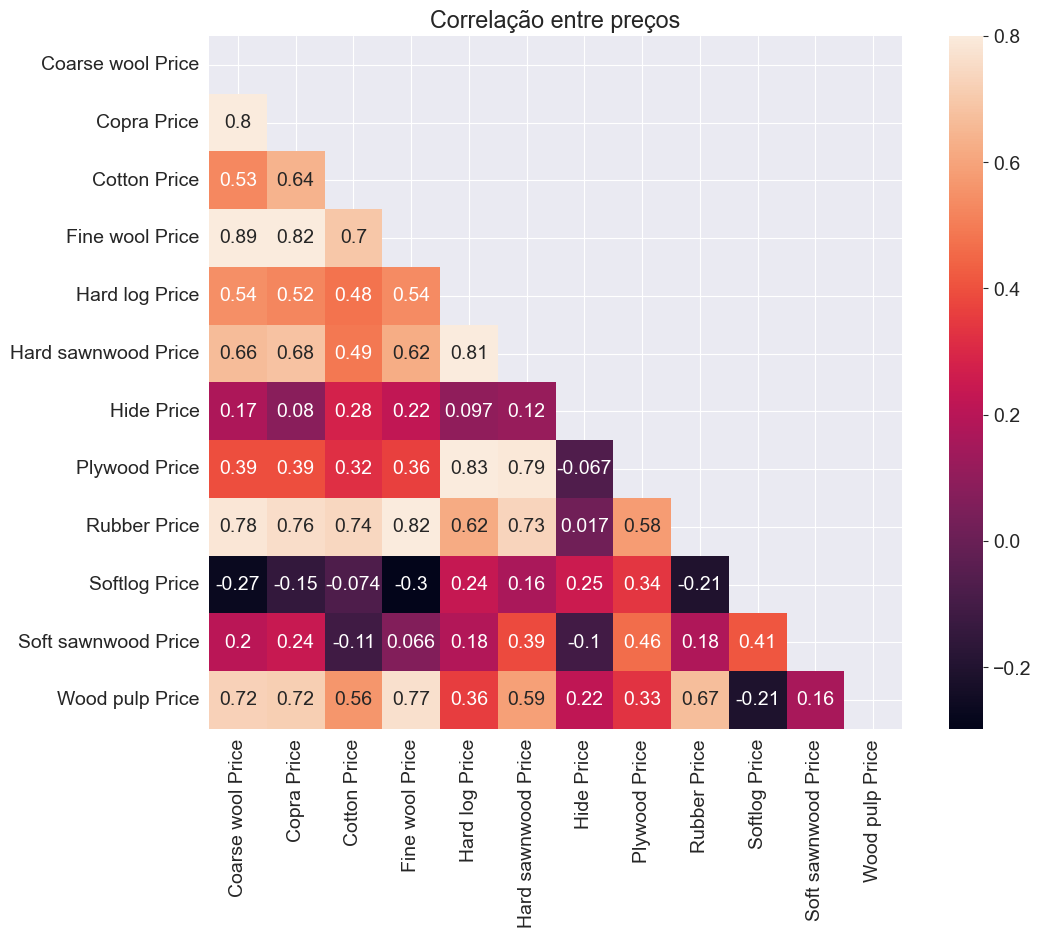

In [20]:
raw_material = ['Coarse wool Price',
'Copra Price',
'Cotton Price',
'Fine wool Price',
'Hard log Price',
'Hard sawnwood Price',
'Hide Price',
'Plywood Price',
'Rubber Price',
'Softlog Price',
'Soft sawnwood Price',
'Wood pulp Price']
fig = plt.figure(figsize=(12,9))
commrat = df[raw_material].corr()
mask = np.triu(np.ones_like(commrat, dtype = bool))
sns.heatmap(commrat, vmax = 0.8, mask = mask, square = True, annot = True)
plt.title('Correlação entre preços')
plt.show()

A MAIOR CORRELAÇÃO É ENTRE O PREÇO DA LÃ FINA E DA LÃ GROSSA

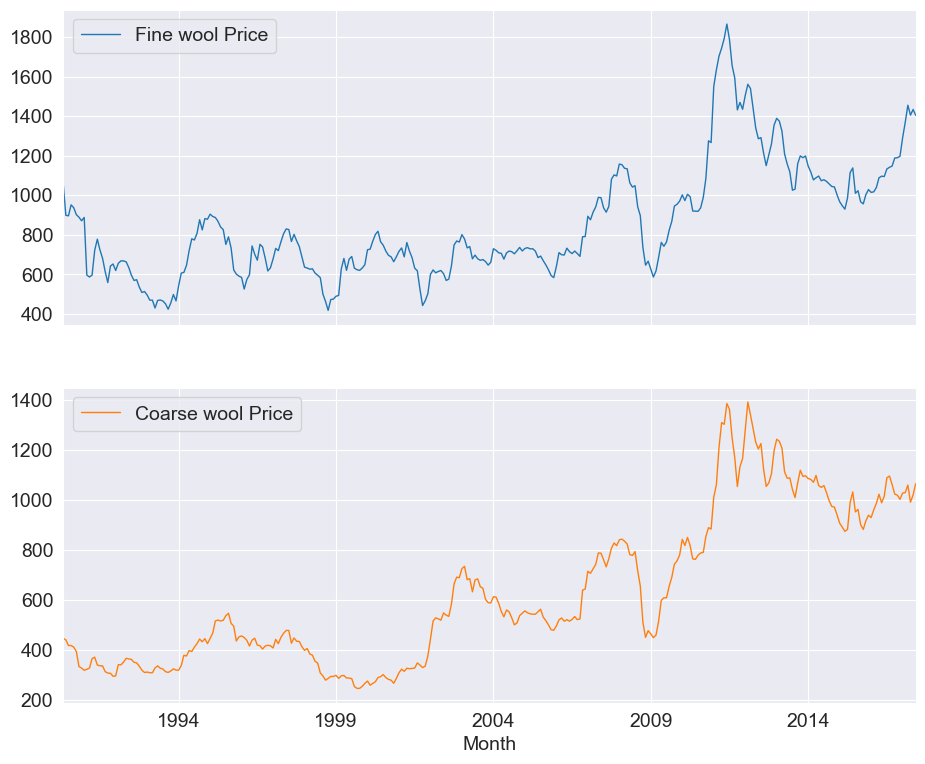

In [21]:
#verificando a situação do produto que tem
#daqui tiro que quando o preço da minha lã fina aumenta ~5% a minha lã grossa vai aumentar ~5% seu preço
axes=df[['Fine wool Price', 'Coarse wool Price']].plot(figsize=(11,9), subplots=True, linewidth=1)

ShapiroResult(statistic=0.9042275547981262, pvalue=1.655723626779737e-13)
ShapiroResult(statistic=0.8934507369995117, pvalue=2.4910742617441882e-14)
ShapiroResult(statistic=0.7717111706733704, pvalue=5.384234525484514e-21)
ShapiroResult(statistic=0.9141407012939453, pvalue=1.0812742845187073e-12)
ShapiroResult(statistic=0.9450696706771851, pvalue=1.1792068432825431e-09)
ShapiroResult(statistic=0.948634922504425, pvalue=3.0714033538714602e-09)
ShapiroResult(statistic=0.9510685205459595, pvalue=6.045650646768763e-09)
ShapiroResult(statistic=0.9722452759742737, pvalue=6.439506250899285e-06)
ShapiroResult(statistic=0.8491337895393372, pvalue=3.3555011682132095e-17)
ShapiroResult(statistic=0.9703599214553833, pvalue=3.1355559713119874e-06)
ShapiroResult(statistic=0.9489568471908569, pvalue=3.3553919642770325e-09)
ShapiroResult(statistic=0.9392238259315491, pvalue=2.6608462655453025e-10)


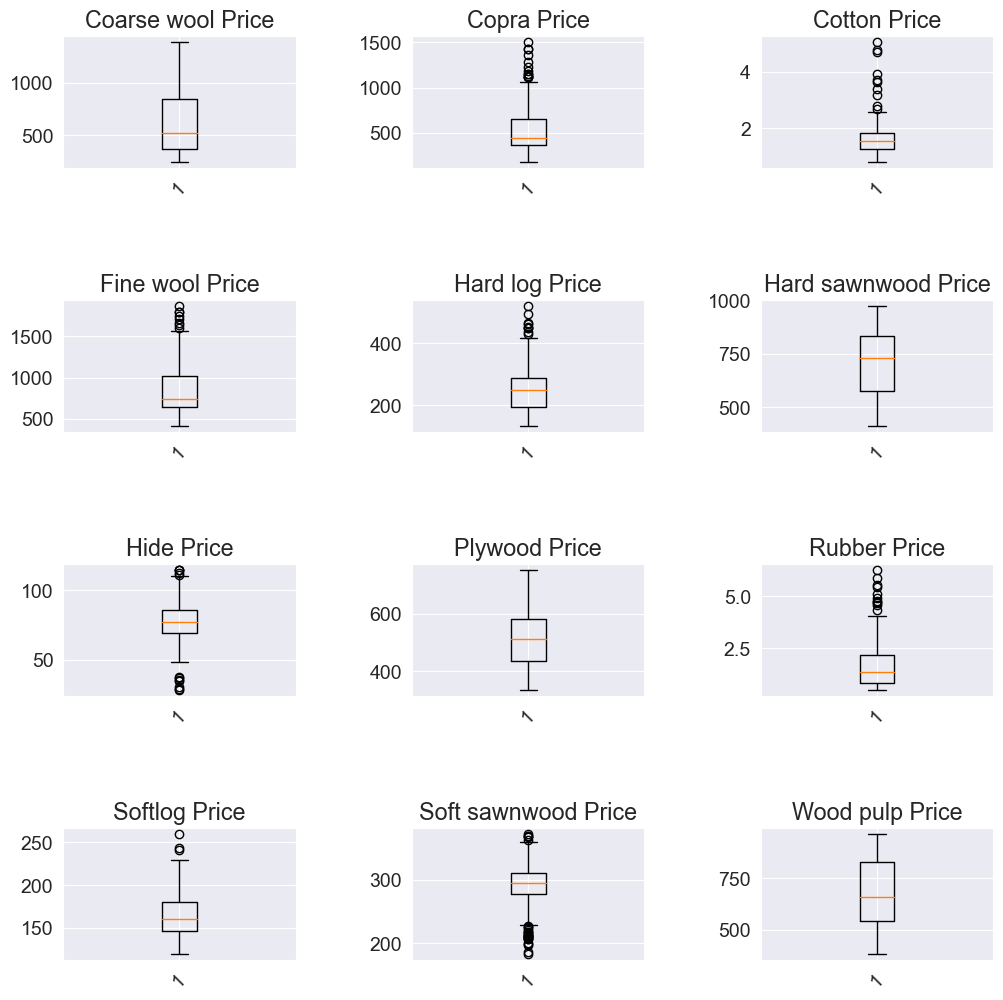

In [22]:
lista_change = []
lst = filtronotin(df,'%')
lst.filtro_tipo_coluna()

plt.figure(figsize=(12,12))
for i in range(len(lista_change)):
  plt.subplot(4,3,i+1)
  plt.subplots_adjust(hspace =1, wspace=0.5)
  plt.title(lista_change[i])
  plt.boxplot(df[lista_change[i]])
  plt.xticks(rotation = 45)

from scipy.stats import shapiro
for i in df.columns:
  if i in lista_change:
    shap = shapiro(df[i])
    print(shap)

VERIFICAMOS QUE DE TODOS OS PRODUTOS APENAS TRÊS NÃO APRESENTAM OUTLIERS E TODOS NÃO POSSUEM DISTRIBUIÇÃO NORMAL (TESTE DE SHAPIRO MENOR QUE 0,05)

In [23]:
lista_change = []
lst = filtronotin(df,'%')
lst.filtro_tipo_coluna()

#avaliando as amplitudes totais para averiguar quais matérias primas variam mais
for i, value in enumerate(df.columns):
  if value in lista_change:
    y = df[value].describe()[6:7].values - df[value].describe()[4:5].values #utilizei a amplitude interquartilica para dados desnomalizados
    print(i, df[value].max(), '-', df[value].min(), '-' , y)

0 1391.47 - 247.09 - [480.305]
2 1503.0 - 182.0 - [286.125]
4 5.06 - 0.82 - [0.5575]
6 1865.44 - 417.47 - [370.095]
8 520.81 - 133.28 - [91.75]
10 973.6 - 413.37 - [257.5575]
12 114.63 - 28.59 - [16.4625]
14 751.81 - 335.25 - [147.3075]
16 6.26 - 0.49 - [1.315]
18 259.97 - 119.35 - [34.2275]
20 372.6 - 183.61 - [33.17]
22 966.49 - 384.0 - [287.6125]


In [24]:
a = df.columns[4]
b = df.columns[16]
lst = [a,b]
lst

['Cotton Price', 'Rubber Price']

PODEMOS CONCLUIR QUE O ALGODÃO E A BORRACHA FORAM OS PRODUTOS QUE TIVERAM UMA MENOR VARIAÇãO DE PREÇO

In [25]:
grafico = px.line(df, y=lst)
grafico.show()

SENDO QUE ATÉ 2005 A BORRACHA TEVE MENORES VARIAÇÕES E APÓS 2005 O ALGODÃO VARIOU MAIS

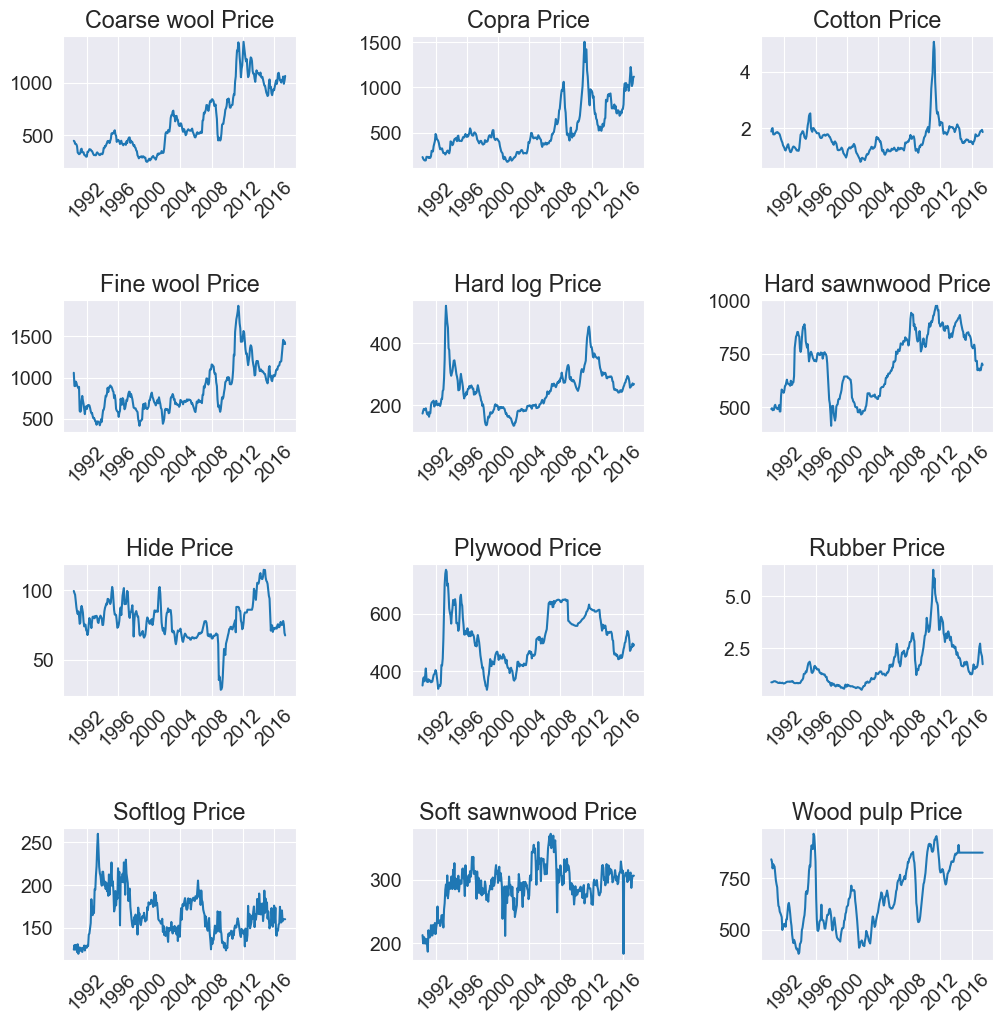

In [26]:
lista_change = []
lst = filtronotin(df,'%')
lst.filtro_tipo_coluna()

plt.figure(figsize=(12,12))
for i in range(len(lista_change)):
  plt.subplot(4,3,i+1)
  plt.subplots_adjust(hspace =1, wspace=0.5)
  plt.title(lista_change[i])
  plt.plot(df[lista_change[i]])
  plt.xticks(rotation = 45)

CONFIRMANDO GRÁFICAMENTE QUE A MENOR VARIAÇÃO FORAM DA BORRACHA E ALGODÃO

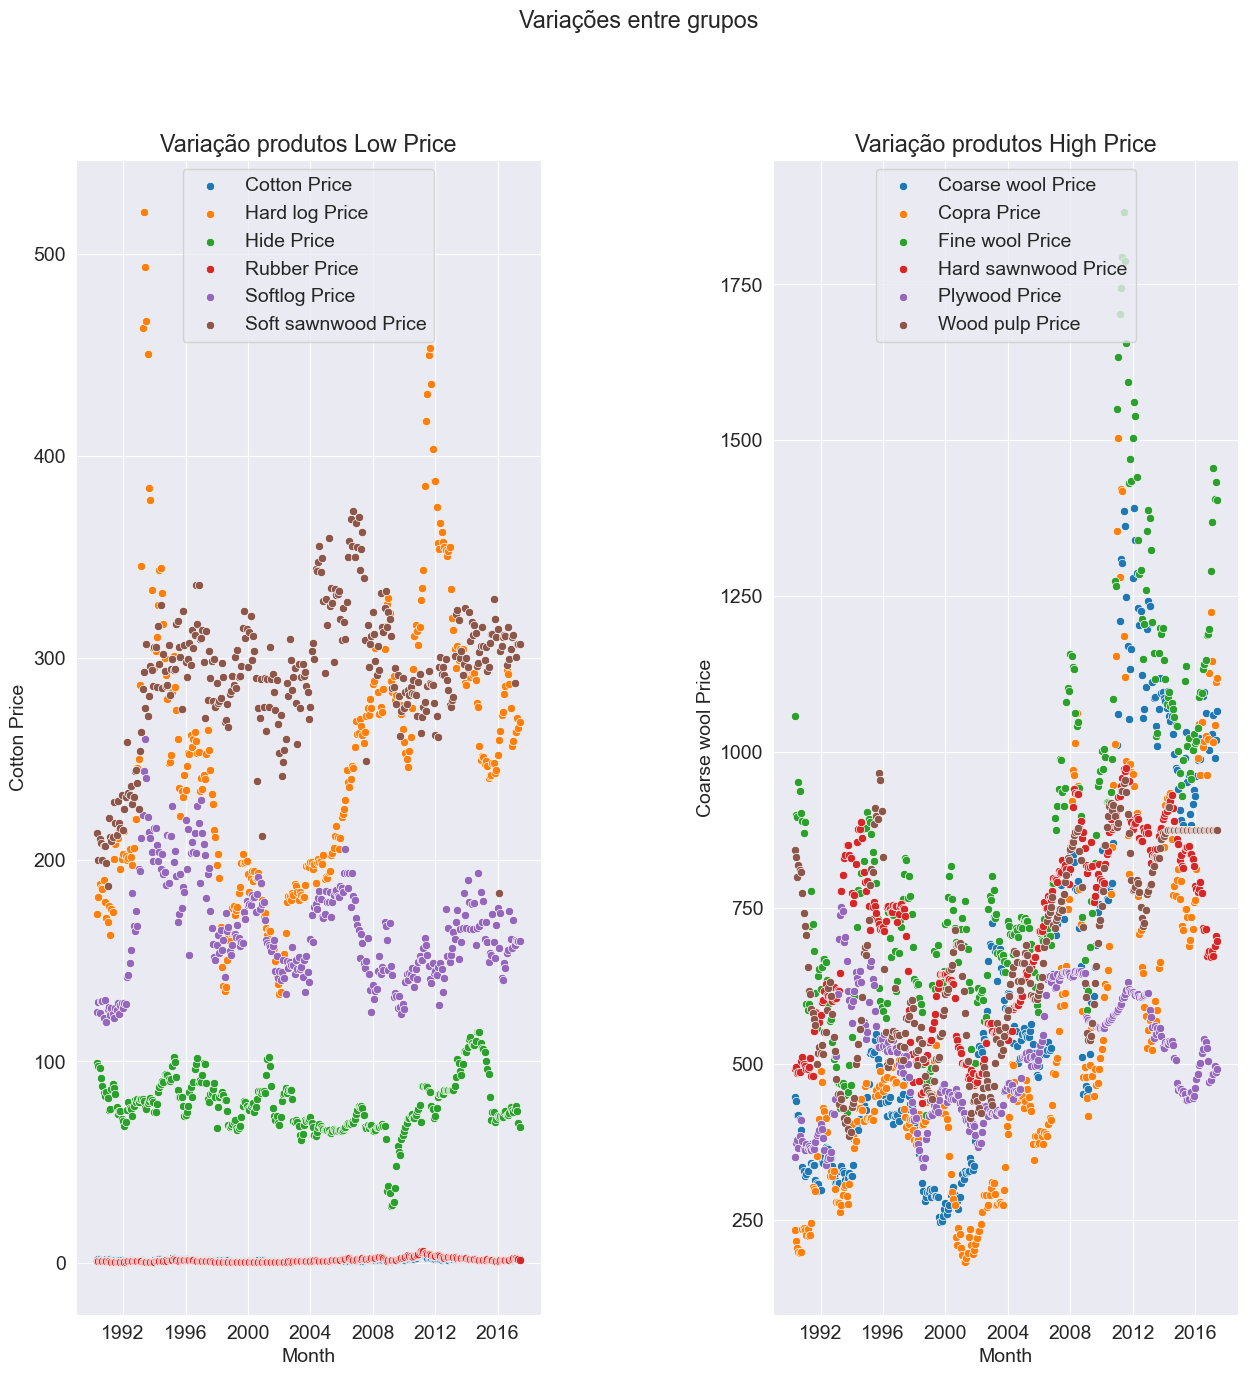

In [27]:
lista_change = []
lst = filtronotin(df,'%')
lst.filtro_tipo_coluna()

low_price = []
high_price = []


for x in df.columns:
  if x in lista_change and df[x].max() < 550:
    low_price.append(x)
  elif x in lista_change and df[x].max() > 550:
    high_price.append(x)


plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace =0.5)
plt.suptitle('Variações entre grupos')
plt.subplot(1,2,1)
for i in range(len(low_price)):
    sns.scatterplot(y=df[low_price[i]], x=df.index)
    plt.legend(low_price, loc='upper center')
    plt.title('Variação produtos Low Price')
plt.subplot(1,2,2)
for i in range(len(high_price)):
    sns.scatterplot(y=df[high_price[i]], x=df.index)
    plt.legend(high_price, loc='upper center')
    plt.title('Variação produtos High Price')



AQUI POSSO INFERIR QUE A LÂ FINA FOI O PRODUTO QUE TEVE A MAIOR VARIÂNCIA DE PREÇO DENTRE TODOS OS DEMAIS.
Dentro dos produtos Low Price o produto que teve pico de variação foi o Hard Log e dentro dos produtos High Price o Fine Wool teve o maior pico

AQUI PODEMOS INFERIR TODOS OS QUARTIS E OUTLIERS DOS PREÇOS DOS PRODUTOS AO LONGO DO TEMPO